In [488]:
# imports

import pandas as pd
import numpy as np
import requests
import pprint

from bs4 import BeautifulSoup
import json
import time
import copy
from pymongo import MongoClient
import time

# for plotting
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns; sns.set()
from pandas.plotting import scatter_matrix

# for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

client = MongoClient('localhost', 27017)

In [7]:
# import mongo database and collections

db = client['tea']
staar = db['staar']
staff = db['staff']

In [8]:
# count number of documents in staar collection

staar.find().count()

/Users/rakhi/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  This is separate from the ipykernel package so we can avoid doing imports until


4606

In [9]:
# count number of documents in staff collection
staff.find().count()

/Users/rakhi/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


4606

In [10]:
# staar parser put together WITHOUT ROW INDICES (v2)
#### FINAL STAAR PARSER

all_data_staar = []
broken_staar_count = 0
# remove limit(20) for all records
for record in staar.find().limit(200):
    campus_id = record['staar_school_id']
#     print(campus_id)
    html_staar = record['html_staar']
    soup_staar = BeautifulSoup(html_staar, 'html.parser')
# get all of the Algebra I score data
    staar_table = soup_staar.find("table", attrs={"class": "table"})
    staar_table_data = staar_table.tbody.find_all("tr")
    staar_data_per_campus_id = []
    staar_data_per_campus_id.append(campus_id)
    try:
        for i, tr in enumerate(staar_table_data):
            if 'End of Course Algebra I' in tr.find_all('td')[0].text:
#                 print(tr.find_all('td')[0].text)
                for td in tr.find_all("td"):
                    staar_data_per_campus_id.append(td.text)
                all_data_staar.append(staar_data_per_campus_id)
                for td in staar_table_data[i+2].find_all('td'):
                    staar_data_per_campus_id.append(td.text)
                for td in staar_table_data[i+4].find_all('td'):
                    staar_data_per_campus_id.append(td.text)
    except:
        print(campus_id)
        broken_staar_count += 1
# # NEED HELP HERE
# # get all Algebra I score column headings
#     staar_headings = soup_staar.find("thead")
#     staar_headings_data = staar_headings.find_all("th")
#     headings_staar = []
#     for i in range(len(staar_headings_data)):
#         heading = staar_headings_data[i].text
#         headings_staar.append(heading)



In [11]:
broken_staar_count

0

In [12]:
all_data_staar

[["'001902001",
  '\xa0End of Course Algebra I\n\xa0\xa0At Approaches Grade Level or Above                            ',
  '     2019',
  '      85%',
  '      86%',
  '      86%',
  '*',
  '*',
  '      82%',
  '-',
  '-',
  '-',
  '     100%',
  '      60%',
  '*',
  '      89%',
  '      79%',
  '      79%',
  '-',
  '\xa0\xa0\xa0At Meets Grade Level or Above                                                                                ',
  '     2019',
  '      61%',
  '      69%',
  '      69%',
  '*',
  '*',
  '      69%',
  '-',
  '-',
  '-',
  '      80%',
  '      27%',
  '*',
  '      69%',
  '      71%',
  '      59%',
  '-',
  '\xa0\xa0\xa0At Masters Grade Level                                                                                       ',
  '     2019',
  '      37%',
  '      37%',
  '      37%',
  '*',
  '*',
  '      31%',
  '-',
  '-',
  '-',
  '      60%',
  '       0%',
  '*',
  '      37%',
  '      36%',
  '      41%',
  '-'],
 ["'001906002",
  '\xa0End 

In [13]:
### FINAL STAFF PARSER

# staff parser put together WITHOUT ROW INDICES (v2)

all_data_staff = []
broken_count_staff = 0
for record in staff.find().limit(200):
    try:
        campus_id = record['staff_school_id']
        html_staff = record['html_staff']
        soup_staff = BeautifulSoup(html_staff, 'html.parser')
        staff_table = soup_staff.find("table", attrs={"class": "table"})
#         print(staff_table)
        staff_table_data = staff_table.tbody.find_all("tr")
# get all of the teacher racial demographic data
        staff_data_per_campus_id = []
        staff_data_per_campus_id.append(campus_id)
        for i, tr in enumerate(staff_table_data):
            if 'Teachers by Ethnicity and Sex' in tr.find_all('td')[0].text:
#                 print(tr.find_all('td')[0].text)
                for td in tr.find_all("td"):
                    staff_data_per_campus_id.append(td.text)
                all_data_staff.append(staff_data_per_campus_id)
                for td in staff_table_data[i+1].find_all('td'):
                    staff_data_per_campus_id.append(td.text)
                for td in staff_table_data[i+2].find_all('td'):
                    staff_data_per_campus_id.append(td.text)
                for td in staff_table_data[i+3].find_all('td'):
                    staff_data_per_campus_id.append(td.text)
                for td in staff_table_data[i+4].find_all('td'):
                    staff_data_per_campus_id.append(td.text)
                for td in staff_table_data[i+5].find_all('td'):
                    staff_data_per_campus_id.append(td.text)
                for td in staff_table_data[i+6].find_all('td'):
                    staff_data_per_campus_id.append(td.text)
# staff_data_per_campus_id = []
#         staff_data_per_campus_id.append(campus_id)
#         for td in staff_table_data[16].find_all("td"):
#             staff_data_per_campus_id.append(td.text)
#         for td in staff_table_data[17].find_all("td"):
#             staff_data_per_campus_id.append(td.text)
#         all_data_staff.append(staff_data_per_campus_id)
# # get all of the teacher racial demographic data column headings
#         staff_headings = soup_staff.find("thead")
#         staff_headings_data = staff_headings.find_all("th")
#         headings_staff = []
#         for i in range(len(staff_headings_data)):
#             heading = staff_headings_data[i].text
#             headings_staff.append(heading)
    except:
        print(campus_id)
        broken_count_staff += 1

'011904004
'011905011
'014903006
'014903010
'014903046
'014901005
'014901042
'014905003
'014905004
'014906003
'015822013
'015822014
'015827005
'015831006
'015835007
'015840001
'014907042
'014908002
'014910042
'015907028
'015908039
'015908046
'015911007
'015915061
'015915133
'015917043
'017901002
'019905002
'019913002


In [14]:
broken_count_staff

29

In [15]:
all_data_staff

[["'001902001",
  'Teachers by Ethnicity and Sex:\n\xa0\xa0\xa0African American                                             ',
  '       1.0',
  '     5.2%',
  '     7.8%',
  '    10.6%',
  '\xa0\xa0\xa0Hispanic                                                                                             ',
  '       0.8',
  '     4.3%',
  '     2.0%',
  '    27.7%',
  '\xa0\xa0\xa0White                                                                                                ',
  '      16.9',
  '    90.5%',
  '    90.2%',
  '    58.4%',
  '\xa0\xa0\xa0American Indian                                                                                      ',
  '       0.0',
  '     0.0%',
  '     0.0%',
  '     0.3%',
  '\xa0\xa0\xa0Asian                                                                                                ',
  '       0.0',
  '     0.0%',
  '     0.0%',
  '     1.7%',
  '\xa0\xa0\xa0Pacific Islander                                                             

In [16]:
# create staff dataframe

staff_df = pd.DataFrame(all_data_staff)

In [17]:
staff_df.head()

0                                                  1           2   \
0  '001902001  Teachers by Ethnicity and Sex:\n   African Ame...         1.0   
1  '001902041  Teachers by Ethnicity and Sex:\n   African Ame...         1.0   
2  '001903002  Teachers by Ethnicity and Sex:\n   African Ame...           -   
3  '001906002  Teachers by Ethnicity and Sex:\n   African Ame...         0.0   
4  '003801001  Teachers by Ethnicity and Sex:\n   African Ame...         0.9   

          3          4          5   \
0       5.2%       7.8%      10.6%   
1       8.2%       7.8%      10.6%   
2          -       0.9%      10.6%   
3       0.0%       3.0%      10.6%   
4       5.6%      10.8%      10.6%   

                                                  6           7          8   \
0     Hispanic                                   ...         0.8       4.3%   
1     Hispanic                                   ...         0.2       1.5%   
2     Hispanic                                   ...           -          -   
3     Hispanic                                   ...         0.0       0.0%   
4     Hispanic                                   ...         0.7       4.3%   

          9   ...                                                 26  \
0       2.0%  ...     Pacific Islander                           ...   
1       2.0%  ...     Pacific Islander                           ...   
2       3.8%  ...     Pacific Islander                           ...   
3       0.0%  ...     Pacific Islander                           ...   
4       6.2%  ...     Pacific Islander                           ...   

           27         28         29         30  \
0         0.0       0.0%       0.0%       0.2%   
1         0.0       0.0%       0.0%       0.2%   
2           -          -       0.0%       0.2%   
3         0.0       0.0%       0.0%       0.2%   
4         0.0       0.0%       0.0%       0.2%   

                                                  31          32         33  \
0     Two or More Races                          ...         0.0       0.0%   
1     Two or More Races                          ...         0.0       0.0%   
2     Two or More Races                          ...           -          -   
3     Two or More Races                          ...         0.0       0.0%   
4     Two or More Races                          ...         0.0       0.0%   

          34         35  
0       0.0%       1.1%  
1       0.0%       1.1%  
2       0.0%       1.1%  
3       0.0%       1.1%  
4       0.0%       1.1%  

[5 rows x 36 columns]

In [18]:
staff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       171 non-null    object
 1   1       171 non-null    object
 2   2       171 non-null    object
 3   3       171 non-null    object
 4   4       171 non-null    object
 5   5       171 non-null    object
 6   6       171 non-null    object
 7   7       171 non-null    object
 8   8       171 non-null    object
 9   9       171 non-null    object
 10  10      171 non-null    object
 11  11      171 non-null    object
 12  12      171 non-null    object
 13  13      171 non-null    object
 14  14      171 non-null    object
 15  15      171 non-null    object
 16  16      171 non-null    object
 17  17      171 non-null    object
 18  18      171 non-null    object
 19  19      171 non-null    object
 20  20      171 non-null    object
 21  21      171 non-null    object
 22  22      171 non-null    ob

In [19]:
# remove percent signs and leading text from staff dataframe

for i in range(len(staff_df.columns)):
    staff_df[i] = staff_df[i].replace(to_replace = '  ', value='', regex=True)
    staff_df[i] = staff_df[i].replace(to_replace = '%', value='', regex=True)
    staff_df[1] = staff_df[1].replace(to_replace = str("Teachers by Ethnicity and Sex:\n"), value="", regex=True)

In [20]:
staff_df.head()

0                     1     2     3     4     5             6   \
0  '001902001     African American    1.0   5.2   7.8  10.6     Hispanic    
1  '001902041     African American    1.0   8.2   7.8  10.6     Hispanic    
2  '001903002     African American      -     -   0.9  10.6     Hispanic    
3  '001906002     African American    0.0   0.0   3.0  10.6     Hispanic    
4  '003801001     African American    0.9   5.6  10.8  10.6     Hispanic    

     7     8     9   ...                    26    27    28    29    30  \
0   0.8   4.3   2.0  ...     Pacific Islander    0.0   0.0   0.0   0.2   
1   0.2   1.5   2.0  ...     Pacific Islander    0.0   0.0   0.0   0.2   
2     -     -   3.8  ...     Pacific Islander      -     -   0.0   0.2   
3   0.0   0.0   0.0  ...     Pacific Islander    0.0   0.0   0.0   0.2   
4   0.7   4.3   6.2  ...     Pacific Islander    0.0   0.0   0.0   0.2   

                     31    32    33    34    35  
0     Two or More Races   0.0   0.0   0.0   1.1  
1     Two or More Races   0.0   0.0   0.0   1.1  
2     Two or More Races     -     -   0.0   1.1  
3     Two or More Races   0.0   0.0   0.0   1.1  
4     Two or More Races   0.0   0.0   0.0   1.1  

[5 rows x 36 columns]

In [21]:
# remove /xa0 invisible spaces from table

import re
staff_df[1]= staff_df[1].map(lambda x: re.sub(r'[^\x00-\x7F]+','',x).strip())
staff_df[6]= staff_df[6].map(lambda x: re.sub(r'[^\x00-\x7F]+','',x).strip())
staff_df[11]= staff_df[11].map(lambda x: re.sub(r'[^\x00-\x7F]+','',x).strip())
staff_df[16]= staff_df[16].map(lambda x: re.sub(r'[^\x00-\x7F]+','',x).strip())
staff_df[21]= staff_df[21].map(lambda x: re.sub(r'[^\x00-\x7F]+','',x).strip())
staff_df[26]= staff_df[26].map(lambda x: re.sub(r'[^\x00-\x7F]+','',x).strip())
staff_df[31]= staff_df[31].map(lambda x: re.sub(r'[^\x00-\x7F]+','',x).strip())
staff_df.head()

0                 1     2     3     4     5         6     7     8   \
0  '001902001  African American   1.0   5.2   7.8  10.6  Hispanic   0.8   4.3   
1  '001902041  African American   1.0   8.2   7.8  10.6  Hispanic   0.2   1.5   
2  '001903002  African American     -     -   0.9  10.6  Hispanic     -     -   
3  '001906002  African American   0.0   0.0   3.0  10.6  Hispanic   0.0   0.0   
4  '003801001  African American   0.9   5.6  10.8  10.6  Hispanic   0.7   4.3   

     9   ...                26    27    28    29    30                 31  \
0   2.0  ...  Pacific Islander   0.0   0.0   0.0   0.2  Two or More Races   
1   2.0  ...  Pacific Islander   0.0   0.0   0.0   0.2  Two or More Races   
2   3.8  ...  Pacific Islander     -     -   0.0   0.2  Two or More Races   
3   0.0  ...  Pacific Islander   0.0   0.0   0.0   0.2  Two or More Races   
4   6.2  ...  Pacific Islander   0.0   0.0   0.0   0.2  Two or More Races   

     32    33    34    35  
0   0.0   0.0   0.0   1.1  
1   0.0   0.0   0.0   1.1  
2     -     -   0.0   1.1  
3   0.0   0.0   0.0   1.1  
4   0.0   0.0   0.0   1.1  

[5 rows x 36 columns]

In [22]:
# drop unnecessary campus count/average columns and title columns in staff_df

staff_df.drop([1], axis=1, inplace=True)
staff_df.drop([2], axis=1, inplace=True)
staff_df.drop([6], axis=1, inplace=True)
staff_df.drop([7], axis=1, inplace=True)
staff_df.drop([11], axis=1, inplace=True)
staff_df.drop([12], axis=1, inplace=True)
staff_df.drop([16], axis=1, inplace=True)
staff_df.drop([17], axis=1, inplace=True)
staff_df.drop([21], axis=1, inplace=True)
staff_df.drop([22], axis=1, inplace=True)
staff_df.drop([26], axis=1, inplace=True)
staff_df.drop([27], axis=1, inplace=True)
staff_df.drop([31], axis=1, inplace=True)
staff_df.drop([32], axis=1, inplace=True)

In [23]:
staff_df.head()

0     3     4     5     8     9     10      13    14    15  ...  \
0  '001902001   5.2   7.8  10.6   4.3   2.0  27.7    90.5  90.2  58.4  ...   
1  '001902041   8.2   7.8  10.6   1.5   2.0  27.7    90.3  90.2  58.4  ...   
2  '001903002     -   0.9  10.6     -   3.8  27.7       -  95.3  58.4  ...   
3  '001906002   0.0   3.0  10.6   0.0   0.0  27.7   100.0  97.0  58.4  ...   
4  '003801001   5.6  10.8  10.6   4.3   6.2  27.7    90.2  83.1  58.4  ...   

     20    23    24    25    28    29    30    33    34    35  
0   0.3   0.0   0.0   1.7   0.0   0.0   0.2   0.0   0.0   1.1  
1   0.3   0.0   0.0   1.7   0.0   0.0   0.2   0.0   0.0   1.1  
2   0.3     -   0.0   1.7     -   0.0   0.2     -   0.0   1.1  
3   0.3   0.0   0.0   1.7   0.0   0.0   0.2   0.0   0.0   1.1  
4   0.3   0.0   0.0   1.7   0.0   0.0   0.2   0.0   0.0   1.1  

[5 rows x 22 columns]

In [24]:
# rename columns in staff_df

staff_df.rename(columns = {0:'Campus_ID', 3:'Campus_African_American', 4:'District_African_American', 5: 'State_African American', 
                                           8: 'Campus_Hispanic', 9: 'District_Hispanic', 10: 'State_Hispanic', 
                                           13: 'Campus_White', 14: 'District_White', 15:'State_White', 
                                           18: 'Campus_American_Indian', 19: 'District_American_Indian', 20:'State_American_Indian',
                                            23: 'Campus_Asian', 24: 'District_Asian', 25: 'State_Asian',
                                            28: 'Campus_Pacific_Islander', 29: 'District_Pacific_Islander', 30: 'State_Pacific_Islander',
                                            33: 'Campus_Two_or_More_Races', 34: 'District_Two_or_More_Races', 35: 'State_Two_or_More_Races'},
                                            inplace = True)

In [612]:
staff_df.head()

Campus_ID Campus_African_American District_African_American  \
0  '001902001                     5.2                       7.8   
1  '001902041                     8.2                       7.8   
2  '001903002                       -                       0.9   
3  '001906002                     0.0                       3.0   
4  '003801001                     5.6                      10.8   

  State_African American Campus_Hispanic District_Hispanic State_Hispanic  \
0                   10.6             4.3               2.0           27.7   
1                   10.6             1.5               2.0           27.7   
2                   10.6               -               3.8           27.7   
3                   10.6             0.0               0.0           27.7   
4                   10.6             4.3               6.2           27.7   

  Campus_White District_White State_White  ... State_American_Indian  \
0         90.5           90.2        58.4  ...                   0.3   
1         90.3           90.2        58.4  ...                   0.3   
2            -           95.3        58.4  ...                   0.3   
3        100.0           97.0        58.4  ...                   0.3   
4         90.2           83.1        58.4  ...                   0.3   

  Campus_Asian District_Asian State_Asian Campus_Pacific_Islander  \
0          0.0            0.0         1.7                     0.0   
1          0.0            0.0         1.7                     0.0   
2            -            0.0         1.7                       -   
3          0.0            0.0         1.7                     0.0   
4          0.0            0.0         1.7                     0.0   

  District_Pacific_Islander State_Pacific_Islander Campus_Two_or_More_Races  \
0                       0.0                    0.2                      0.0   
1                       0.0                    0.2                      0.0   
2                       0.0                    0.2                        -   
3                       0.0                    0.2                      0.0   
4                       0.0                    0.2                      0.0   

  District_Two_or_More_Races State_Two_or_More_Races  
0                        0.0                     1.1  
1                        0.0                     1.1  
2                        0.0                     1.1  
3                        0.0                     1.1  
4                        0.0                     1.1  

[5 rows x 22 columns]

In [613]:
staff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Campus_ID                   171 non-null    object
 1   Campus_African_American     171 non-null    object
 2   District_African_American   171 non-null    object
 3   State_African American      171 non-null    object
 4   Campus_Hispanic             171 non-null    object
 5   District_Hispanic           171 non-null    object
 6   State_Hispanic              171 non-null    object
 7   Campus_White                171 non-null    object
 8   District_White              171 non-null    object
 9   State_White                 171 non-null    object
 10  Campus_American_Indian      171 non-null    object
 11  District_American_Indian    171 non-null    object
 12  State_American_Indian       171 non-null    object
 13  Campus_Asian                171 non-null    object

In [26]:
# create staar_df dataframe

staar_df = pd.DataFrame(all_data_staar)

In [614]:
staar_df.head()

Campus_ID State_Approaching District_Approaching Campus_Approaching  \
0  '001902001                85                   86                 86   
1  '001906002                85                   89                 88   
2  '003801001                85                   99                 99   
3  '003904001                85                   81                 82   
4  '004901041                85                   93                100   

  African_American_Approaching Hispanic_Approaching White_Approaching  \
0                            *                    *                82   
1                            *                    *                95   
2                           92                  100               100   
3                           60                   71                83   
4                            -                  100               100   

  American_Indian_Approaching Asian_Approaching Pacifc_Islander_Approaching  \
0                           -                 -                           -   
1                           -                 -                           -   
2                           -                 *                           -   
3                           *                 -                           -   
4                           -                 *                           -   

   ... African_American_Masters Hispanic_Masters White_Masters  \
0  ...                        *                *            31   
1  ...                        *                *            43   
2  ...                       62               60            69   
3  ...                       20               29            35   
4  ...                        -              100           100   

  American_Indian_Masters Asian_Masters Pacifc_Islander_Masters  \
0                       -             -                       -   
1                       -             -                       -   
2                       -             *                       -   
3                       *             -                       -   
4                       -             *                       -   

  Two_or_More_Races_Masters Special_Ed_Masters Econ_Disadv_Masters EL_Masters  
0                        60                  0                  41          -  
1                         -                  *                  30          *  
2                         -                  *                  72          *  
3                        38                  4                  31          *  
4                         -                  -                 100          -  

[5 rows x 40 columns]

In [ ]:
staar_df

In [28]:
staar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       127 non-null    object
 1   1       127 non-null    object
 2   2       127 non-null    object
 3   3       127 non-null    object
 4   4       127 non-null    object
 5   5       127 non-null    object
 6   6       127 non-null    object
 7   7       127 non-null    object
 8   8       127 non-null    object
 9   9       127 non-null    object
 10  10      127 non-null    object
 11  11      127 non-null    object
 12  12      127 non-null    object
 13  13      127 non-null    object
 14  14      127 non-null    object
 15  15      127 non-null    object
 16  16      127 non-null    object
 17  17      127 non-null    object
 18  18      127 non-null    object
 19  19      127 non-null    object
 20  20      127 non-null    object
 21  21      127 non-null    object
 22  22      127 non-null    ob

In [29]:
# remove percent signs and leading text

for i in range(len(staar_df.columns)):
#     staff_df[i] = staff_df[i].replace(to_replace = ' ', value='', regex=True)
    staar_df[i] = staar_df[i].replace(to_replace = '%', value='', regex=True)
    staar_df[1] = staar_df[1].replace(to_replace = str("End of Course Algebra I\n"), value="", regex=True)

In [30]:
staar_df.head()

0                                                  1          2   \
0  '001902001     At Approaches Grade Level or Above         ...       2019   
1  '001906002     At Approaches Grade Level or Above         ...       2019   
2  '003801001     At Approaches Grade Level or Above         ...       2019   
3  '003904001     At Approaches Grade Level or Above         ...       2019   
4  '004901041     At Approaches Grade Level or Above         ...       2019   

         3         4         5         6         7         8  9   ... 45 46  \
0        85        86        86         *         *        82  -  ...  -  -   
1        85        89        88         *         *        95  -  ...  -  -   
2        85        99        99        92       100       100  -  ...  -  *   
3        85        81        82        60        71        83  *  ...  *  -   
4        85        93       100         -       100       100  -  ...  -  *   

  47        48        49 50        51        52        53 54  
0  -        60         0  *        37        36        41  -  
1  -         -         *  -        44        30        30  *  
2  -         -         *  -        68        57        72  *  
3  -        38         4  *        38        26        31  *  
4  -         -         -  -       100       100       100  -  

[5 rows x 55 columns]

In [31]:
# drop unnecessary year columns and title columns in staar_df

staar_df.drop([1], axis=1, inplace=True) #title
staar_df.drop([2], axis=1, inplace=True) #year
staar_df.drop([14], axis=1, inplace=True)
staar_df.drop([15], axis=1, inplace=True)
staar_df.drop([16], axis=1, inplace=True)
staar_df.drop([19], axis=1, inplace=True) #title
staar_df.drop([20], axis=1, inplace=True) #year
staar_df.drop([32], axis=1, inplace=True)
staar_df.drop([33], axis=1, inplace=True)
staar_df.drop([34], axis=1, inplace=True)
staar_df.drop([37], axis=1, inplace=True) #title
staar_df.drop([38], axis=1, inplace=True) #year
staar_df.drop([50], axis=1, inplace=True)
staar_df.drop([51], axis=1, inplace=True)
staar_df.drop([52], axis=1, inplace=True)

In [32]:
staar_df.head()

0         3         4         5         6         7         8  9   \
0  '001902001        85        86        86         *         *        82  -   
1  '001906002        85        89        88         *         *        95  -   
2  '003801001        85        99        99        92       100       100  -   
3  '003904001        85        81        82        60        71        83  *   
4  '004901041        85        93       100         -       100       100  -   

  10 11  ...        42        43        44 45 46 47        48        49  \
0  -  -  ...         *         *        31  -  -  -        60         0   
1  -  -  ...         *         *        43  -  -  -         -         *   
2  *  -  ...        62        60        69  -  *  -         -         *   
3  -  -  ...        20        29        35  *  -  -        38         4   
4  *  -  ...         -       100       100  -  *  -         -         -   

         53 54  
0        41  -  
1        30  *  
2        72  *  
3        31  *  
4       100  -  

[5 rows x 40 columns]

In [33]:
staar_df.rename(columns = {0:'Campus_ID',
                           3:'State_Approaching',
                           4: 'District_Approaching',
                           5: 'Campus_Approaching',
                           6: 'African_American_Approaching', 
                            7: 'Hispanic_Approaching',
                           8: 'White_Approaching',
                           9: 'American_Indian_Approaching',
                           10: 'Asian_Approaching',
                           11: 'Pacifc_Islander_Approaching',
                          12: 'Two_or_More_Races_Approaching',
                          13: 'Special_Ed_Approaching',
                          17: 'Econ_Disadv_Approaching',
                          18: 'EL_Approaching',
                           21:'State_Meets',
                           22: 'District_Meets',
                           23: 'Campus_Meets',
                           24: 'African_American_Meets', 
                            25: 'Hispanic_Meets',
                           26: 'White_Meets',
                           27: 'American_Indian_Meets',
                           28: 'Asian_Meets',
                           29: 'Pacifc_Islander_Meets',
                          30: 'Two_or_More_Races_Meets',
                          31: 'Special_Ed_Meets',
                          35: 'Econ_Disadv_Meets',
                          36: 'EL_Meets',
                           39:'State_Masters',
                           40: 'District_Masters',
                           41: 'Campus_Masters',
                           42: 'African_American_Masters', 
                            43: 'Hispanic_Masters',
                           44: 'White_Masters',
                           45: 'American_Indian_Masters',
                           46: 'Asian_Masters',
                           47: 'Pacifc_Islander_Masters',
                          48: 'Two_or_More_Races_Masters',
                          49: 'Special_Ed_Masters',
                          53: 'Econ_Disadv_Masters',
                          54: 'EL_Masters',
                          },
                                            inplace = True)

In [34]:
# merge dataframes

total_df = pd.merge(staff_df, staar_df, on='Campus_ID')

In [610]:
# MAKE SURE THERE ARE NO NON-NUMERICAL VALUES

total_df.fillna(0)
total_df.replace('*', 0, inplace=True)
total_df.replace('-', 0, inplace=True)

total_df.head()

Campus_African_American  District_African_American  \
Campus_ID                                                        
'001902001                      5.2                        7.8   
'001906002                      0.0                        3.0   
'003801001                      5.6                       10.8   
'003904001                      0.0                        0.8   
'004901041                      1.1                        0.9   

            State_African American  Campus_Hispanic  District_Hispanic  \
Campus_ID                                                                
'001902001                    10.6              4.3                2.0   
'001906002                    10.6              0.0                0.0   
'003801001                    10.6              4.3                6.2   
'003904001                    10.6              5.1                1.5   
'004901041                    10.6             16.5               17.7   

            State_Hispanic  Campus_White  District_White  State_White  \
Campus_ID                                                               
'001902001            27.7          90.5            90.2         58.4   
'001906002            27.7         100.0            97.0         58.4   
'003801001            27.7          90.2            83.1         58.4   
'003904001            27.7          94.9            96.9         58.4   
'004901041            27.7          80.3            79.5         58.4   

            Campus_American_Indian  ...  Pacifc_Islander_Masters  \
Campus_ID                           ...                            
'001902001                     0.0  ...                      0.0   
'001906002                     0.0  ...                      0.0   
'003801001                     0.0  ...                      0.0   
'003904001                     0.0  ...                      0.0   
'004901041                     2.1  ...                      0.0   

            Two_or_More_Races_Masters  Special_Ed_Masters  \
Campus_ID                                                   
'001902001                       60.0                 0.0   
'001906002                        0.0                 0.0   
'003801001                        0.0                 0.0   
'003904001                       38.0                 4.0   
'004901041                        0.0                 0.0   

            Econ_Disadv_Masters  EL_Masters  BIPOC_Masters  \
Campus_ID                                                    
'001902001                 41.0         0.0      10.000000   
'001906002                 30.0         0.0       0.000000   
'003801001                 72.0         0.0      20.333333   
'003904001                 31.0         0.0      14.500000   
'004901041                100.0         0.0      16.666667   

            Difference_White_BIPOC_Masters  BIPOC_Masters_no_Asian  \
Campus_ID                                                            
'001902001                       21.000000                    12.0   
'001906002                       43.000000                     0.0   
'003801001                       48.666667                    24.4   
'003904001                       20.500000                    17.4   
'004901041                       83.333333                    20.0   

            Difference_White_BIPOC_Masters_no_Asian  BIPOC_Campus  
Campus_ID                                                          
'001902001                                     19.0           9.5  
'001906002                                     43.0           0.0  
'003801001                                     44.6           9.9  
'003904001                                     17.6           5.1  
'004901041                                     80.0          19.7  

[5 rows x 65 columns]

In [611]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, '001902001 to '020902004
Data columns (total 65 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Campus_African_American                  127 non-null    float64
 1   District_African_American                127 non-null    float64
 2   State_African American                   127 non-null    float64
 3   Campus_Hispanic                          127 non-null    float64
 4   District_Hispanic                        127 non-null    float64
 5   State_Hispanic                           127 non-null    float64
 6   Campus_White                             127 non-null    float64
 7   District_White                           127 non-null    float64
 8   State_White                              127 non-null    float64
 9   Campus_American_Indian                   127 non-null    float64
 10  District_American_Indian               

In [36]:
total_df.describe()

American_Indian_Approaching  American_Indian_Meets
count                        127.0                  127.0
mean                           0.0                    0.0
std                            0.0                    0.0
min                            0.0                    0.0
25%                            0.0                    0.0
50%                            0.0                    0.0
75%                            0.0                    0.0
max                            0.0                    0.0

In [37]:
len(total_df.columns)

61

In [38]:
# change datatypes of each column by casting

total_df.iloc[:,1:] = total_df.iloc[:,1:].astype(float)

In [39]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 126
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Campus_ID                      127 non-null    object 
 1   Campus_African_American        127 non-null    float64
 2   District_African_American      127 non-null    float64
 3   State_African American         127 non-null    float64
 4   Campus_Hispanic                127 non-null    float64
 5   District_Hispanic              127 non-null    float64
 6   State_Hispanic                 127 non-null    float64
 7   Campus_White                   127 non-null    float64
 8   District_White                 127 non-null    float64
 9   State_White                    127 non-null    float64
 10  Campus_American_Indian         127 non-null    float64
 11  District_American_Indian       127 non-null    float64
 12  State_American_Indian          127 non-null    flo

In [40]:
total_df.head()

Campus_ID  Campus_African_American  District_African_American  \
0  '001902001                      5.2                        7.8   
1  '001906002                      0.0                        3.0   
2  '003801001                      5.6                       10.8   
3  '003904001                      0.0                        0.8   
4  '004901041                      1.1                        0.9   

   State_African American  Campus_Hispanic  District_Hispanic  State_Hispanic  \
0                    10.6              4.3                2.0            27.7   
1                    10.6              0.0                0.0            27.7   
2                    10.6              4.3                6.2            27.7   
3                    10.6              5.1                1.5            27.7   
4                    10.6             16.5               17.7            27.7   

   Campus_White  District_White  State_White  ...  African_American_Masters  \
0          90.5            90.2         58.4  ...                       0.0   
1         100.0            97.0         58.4  ...                       0.0   
2          90.2            83.1         58.4  ...                      62.0   
3          94.9            96.9         58.4  ...                      20.0   
4          80.3            79.5         58.4  ...                       0.0   

   Hispanic_Masters  White_Masters  American_Indian_Masters  Asian_Masters  \
0               0.0           31.0                      0.0            0.0   
1               0.0           43.0                      0.0            0.0   
2              60.0           69.0                      0.0            0.0   
3              29.0           35.0                      0.0            0.0   
4             100.0          100.0                      0.0            0.0   

   Pacifc_Islander_Masters  Two_or_More_Races_Masters  Special_Ed_Masters  \
0                      0.0                       60.0                 0.0   
1                      0.0                        0.0                 0.0   
2                      0.0                        0.0                 0.0   
3                      0.0                       38.0                 4.0   
4                      0.0                        0.0                 0.0   

   Econ_Disadv_Masters  EL_Masters  
0                 41.0         0.0  
1                 30.0         0.0  
2                 72.0         0.0  
3                 31.0         0.0  
4                100.0         0.0  

[5 rows x 61 columns]

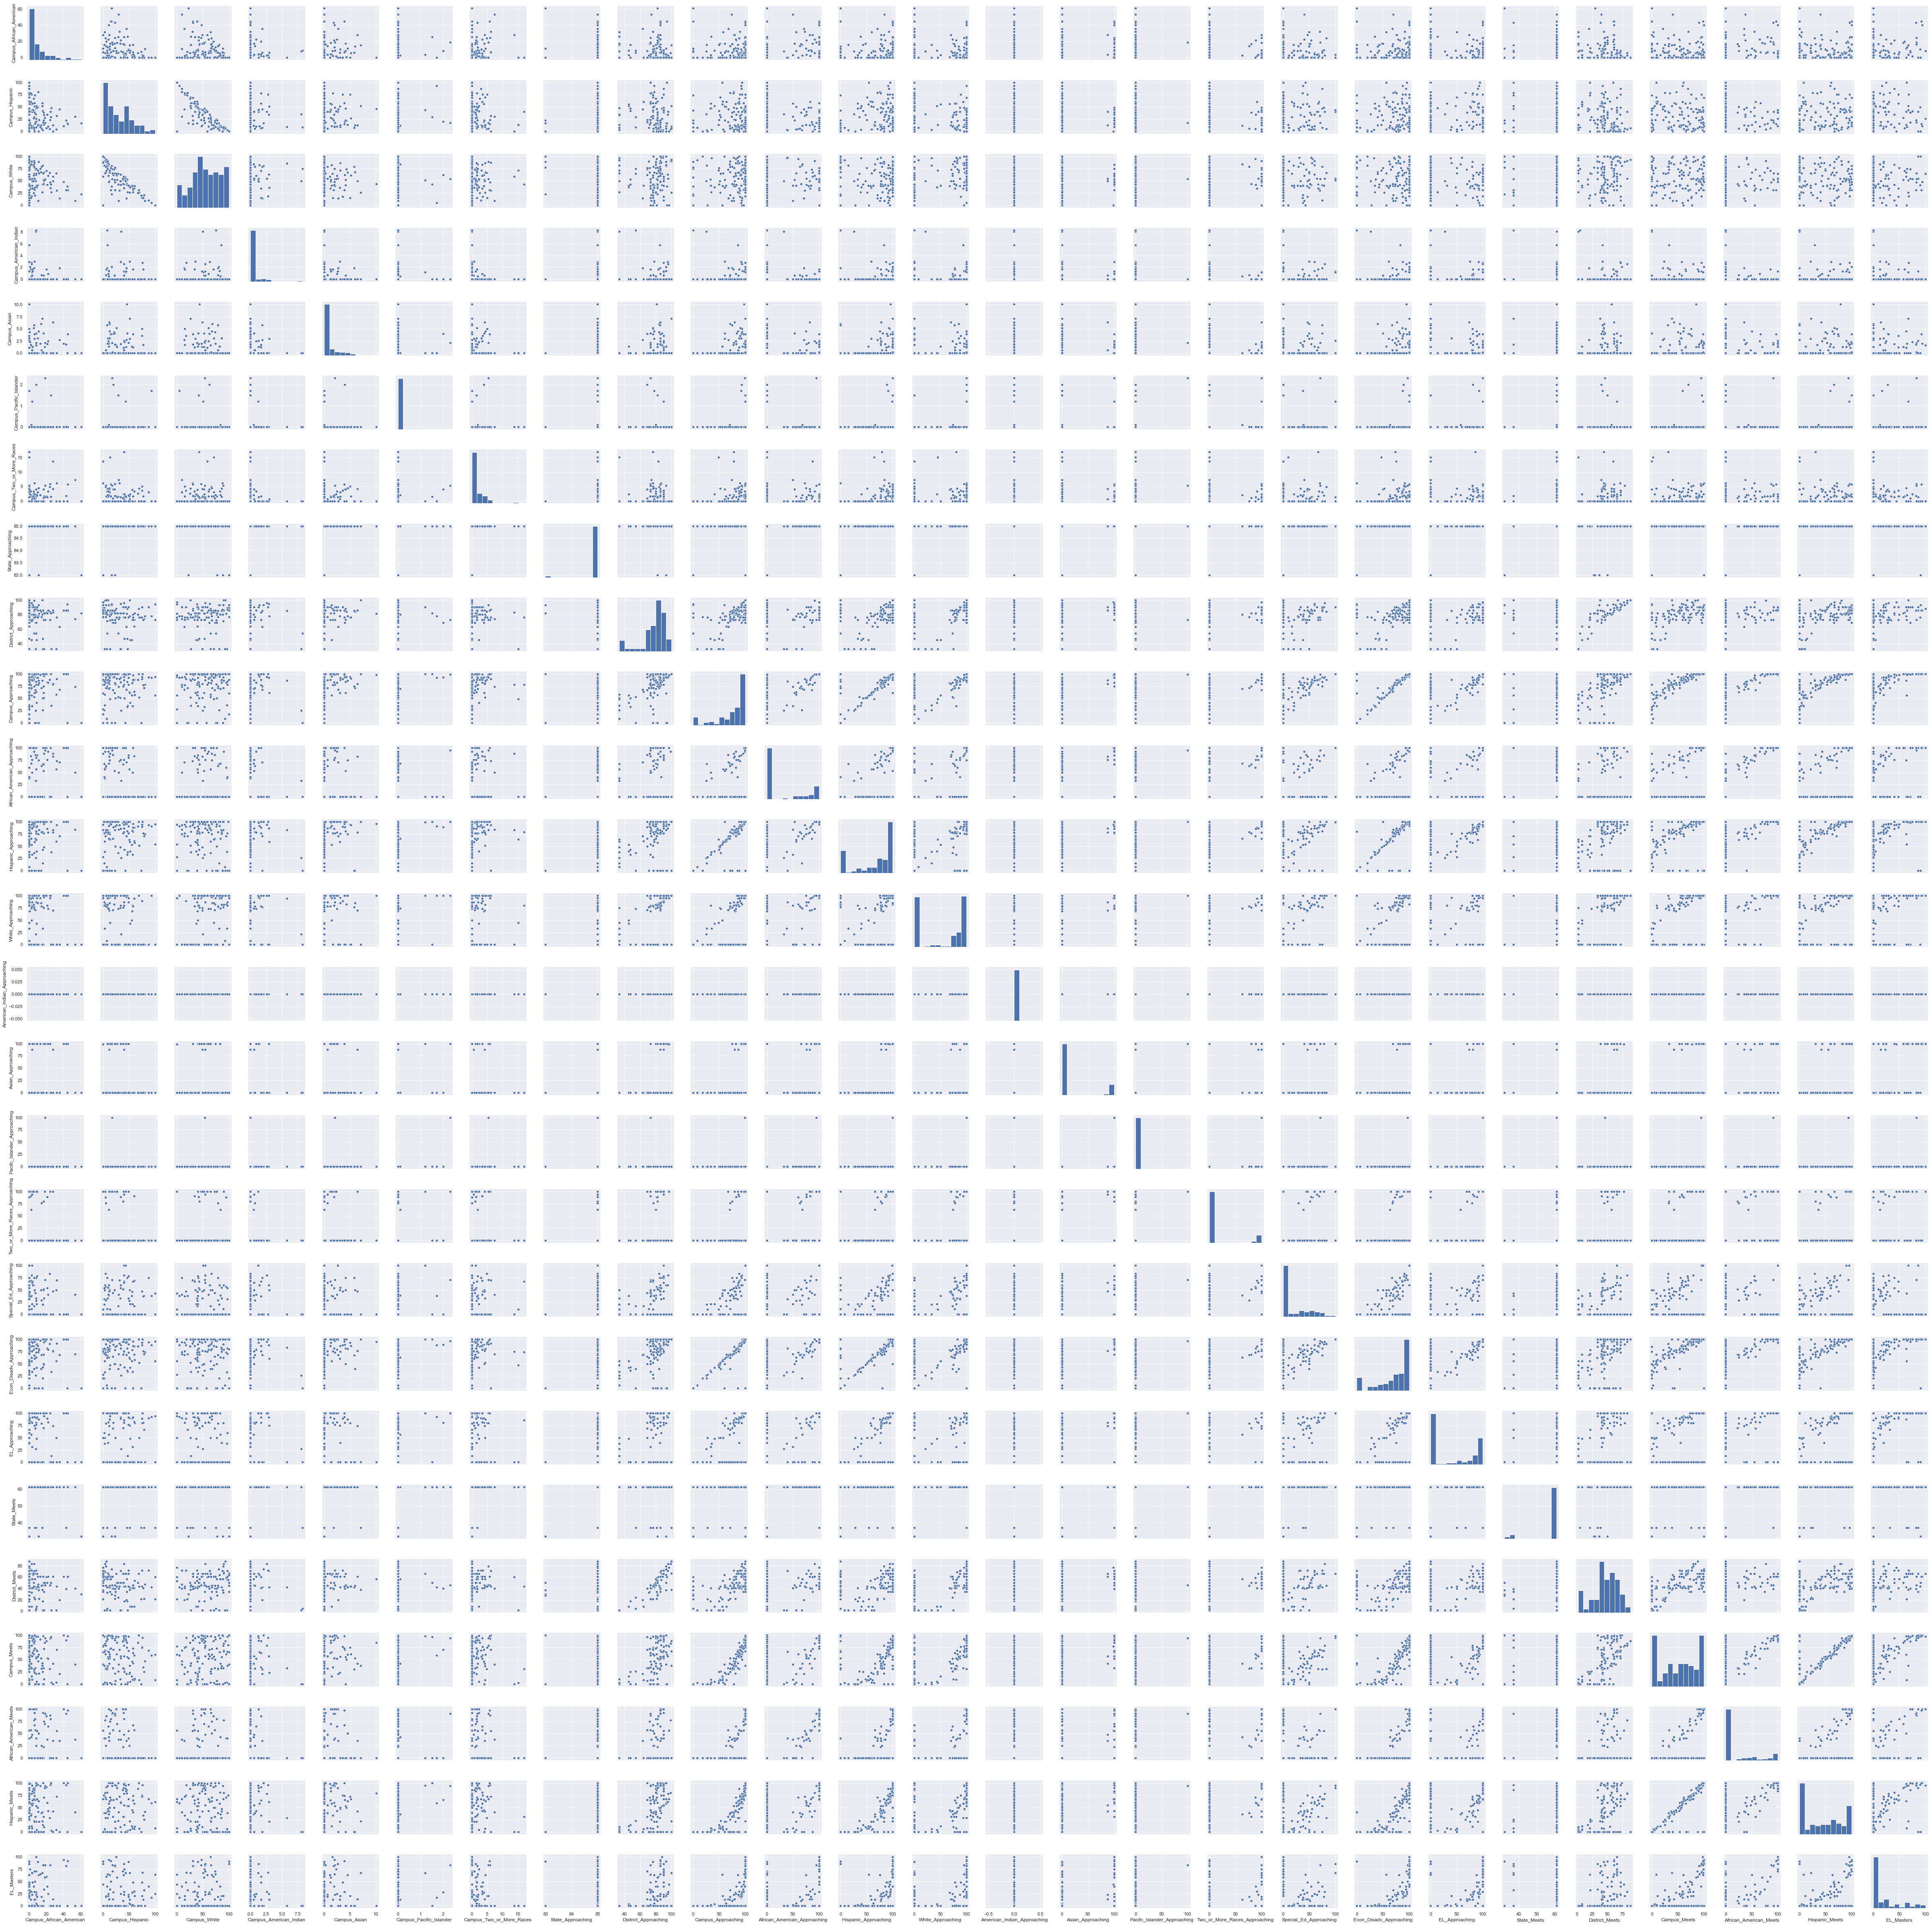

In [117]:
sns.pairplot(total_df.iloc[:,[1,4,7,10,13,16,19,22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 60]])

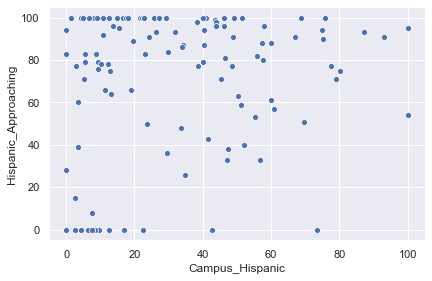

In [105]:
sns.scatterplot(x='Campus_Hispanic', y='Hispanic_Approaching', data=total_df)

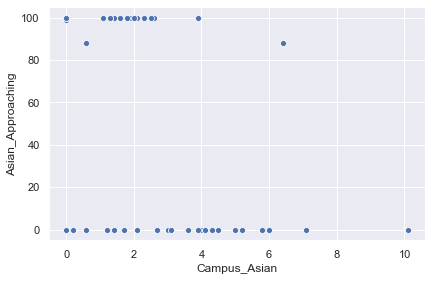

In [71]:
sns.scatterplot(x=total_df['Campus_Asian'], y=total_df['Asian_Approaching'])

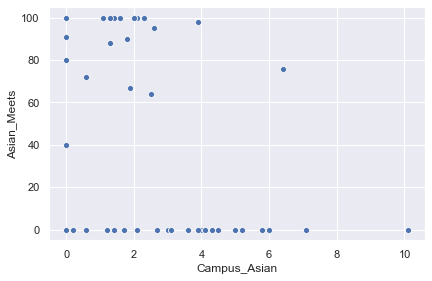

In [70]:
sns.scatterplot(x='Campus_Asian', y='Asian_Meets', data=total_df)

In [73]:
sns.scatterplot(x='Campus_Asian', y='Asian_Masters', data=total_df)

In [76]:
sns.scatterplot(x='Campus_African_American', y='African_American_Approaching', data=total_df)

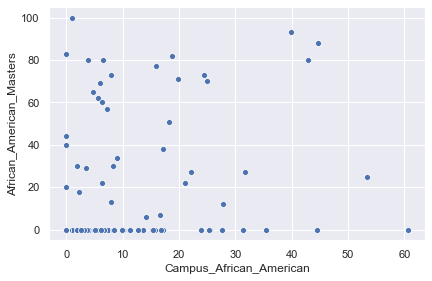

In [77]:
sns.scatterplot(x='Campus_African_American', y='African_American_Masters', data=total_df)

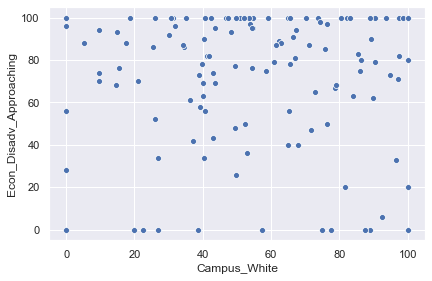

In [80]:
sns.scatterplot(x='Campus_White', y='Econ_Disadv_Approaching', data=total_df)

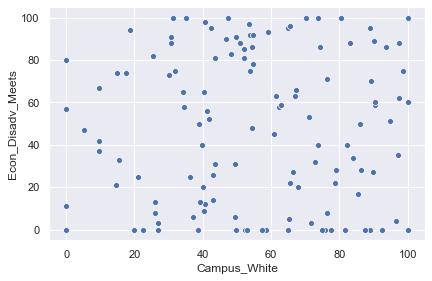

In [81]:
sns.scatterplot(x='Campus_White', y='Econ_Disadv_Meets', data=total_df)

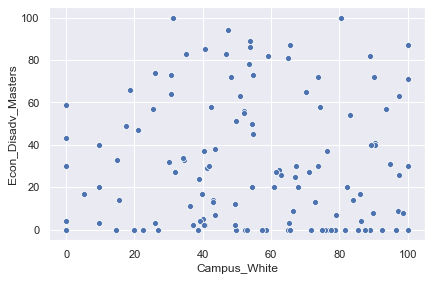

In [82]:
sns.scatterplot(x='Campus_White', y='Econ_Disadv_Masters', data=total_df)

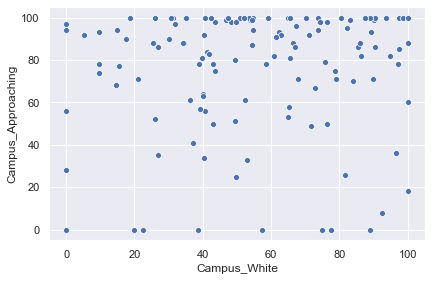

In [83]:
sns.scatterplot(x='Campus_White', y='Campus_Approaching', data=total_df)

In [84]:
sns.scatterplot(x='Campus_White', y='Campus_Meets', data=total_df)

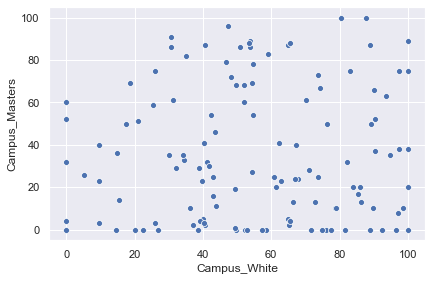

In [85]:
sns.scatterplot(x='Campus_White', y='Campus_Masters', data=total_df)

In [87]:
sns.scatterplot(x='Campus_White', y='African_American_Approaching', data=total_df)

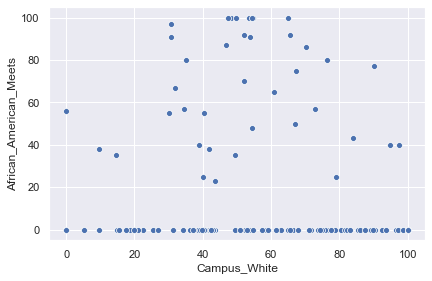

In [88]:
sns.scatterplot(x='Campus_White', y='African_American_Meets', data=total_df)

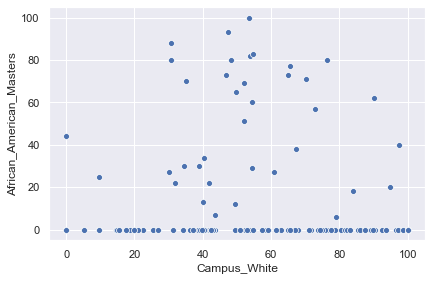

In [89]:
sns.scatterplot(x='Campus_White', y='African_American_Masters', data=total_df)

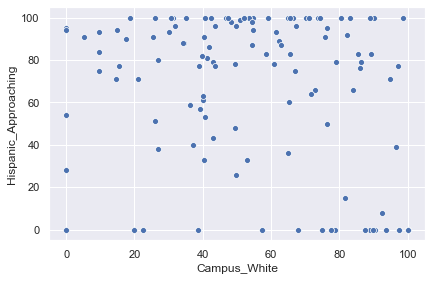

In [90]:
sns.scatterplot(x='Campus_White', y='Hispanic_Approaching', data=total_df)

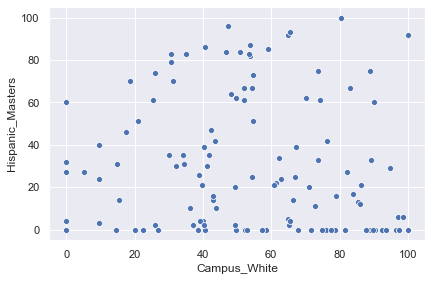

In [91]:
sns.scatterplot(x='Campus_White', y='Hispanic_Masters', data=total_df)

In [92]:
sns.scatterplot(x='Campus_White', y='Two_or_More_Races_Approaching', data=total_df)

In [93]:
sns.scatterplot(x='Campus_White', y='Two_or_More_Races_Meets', data=total_df)

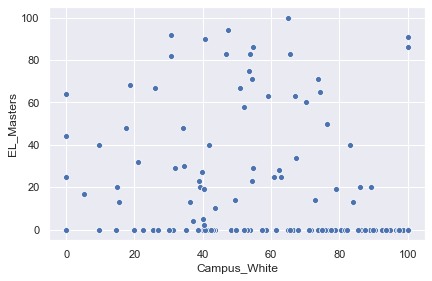

In [94]:
sns.scatterplot(x='Campus_White', y='EL_Masters', data=total_df)

In [95]:
sns.scatterplot(x='Campus_White', y='EL_Meets', data=total_df)

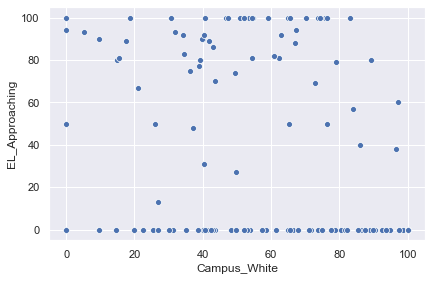

In [97]:
sns.scatterplot(x='Campus_White', y='EL_Approaching', data=total_df)

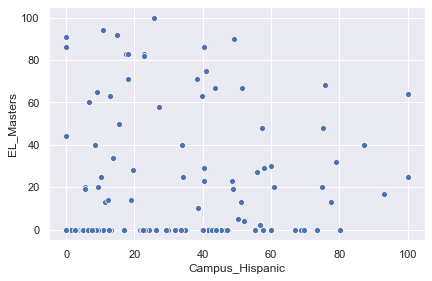

In [98]:
sns.scatterplot(x='Campus_Hispanic', y='EL_Masters', data=total_df)

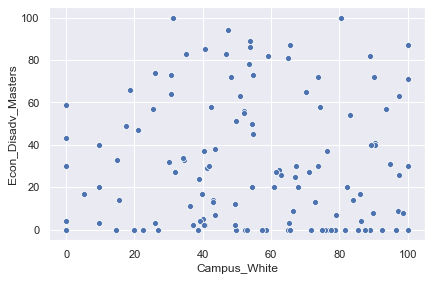

In [101]:
sns.scatterplot(x='Campus_White', y='Econ_Disadv_Masters', data=total_df)

In [102]:
sns.scatterplot(x='Campus_Hispanic', y='Econ_Disadv_Masters', data=total_df)

In [103]:
sns.scatterplot(x='Campus_Hispanic', y='EL_Meets', data=total_df)

In [ ]:
# scatter_matrix(total_df, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3b2c67310>,
      dtype=object)

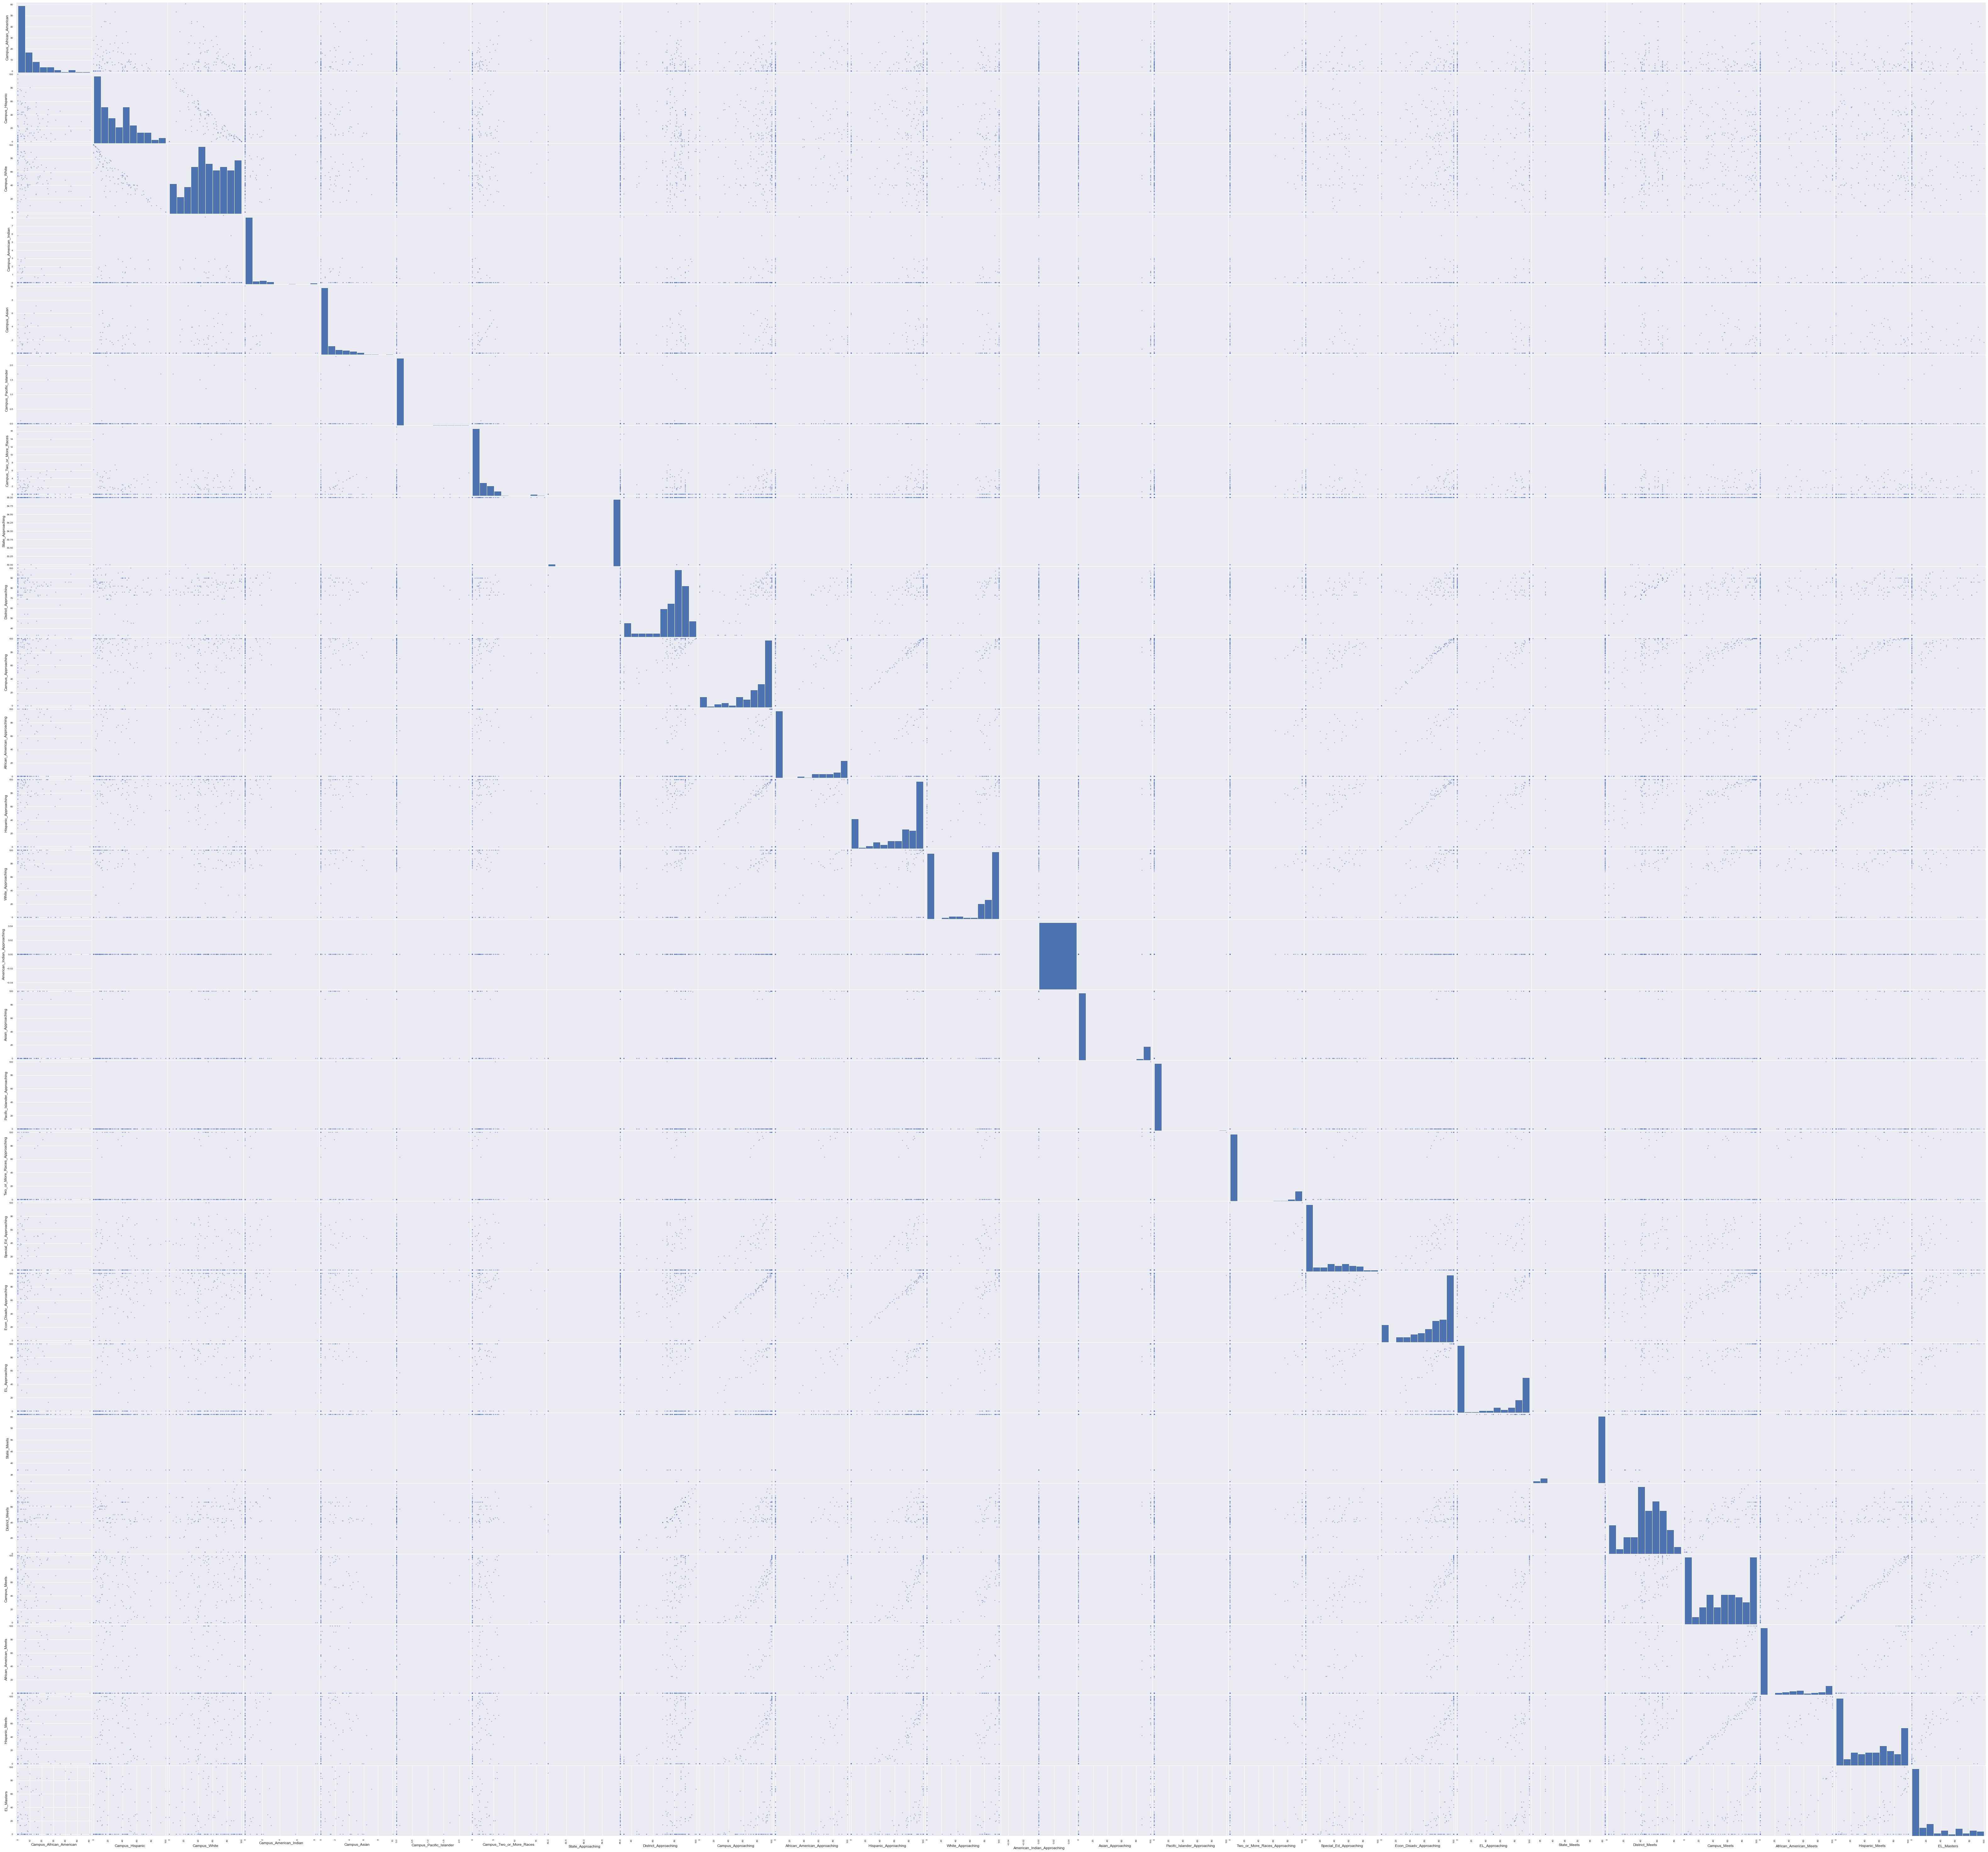

In [113]:
scatter_matrix(total_df.iloc[:,[1,4,7,10,13,16,19,22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 60]], figsize = (100,100))

In [ ]:
# scatter_matrix(total_df.iloc[:,[1,4,7,10,13,16,19,22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 60]])

In [ ]:
# scatter_matrix(total_df.iloc[:,[1,4,7,10,13,16,19,22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]], figsize = (100,100))

In [253]:
total_df = total_df.set_index(['Campus_ID'])

In [605]:
total_df.head()

Campus_African_American  District_African_American  \
Campus_ID                                                        
'001902001                      5.2                        7.8   
'001906002                      0.0                        3.0   
'003801001                      5.6                       10.8   
'003904001                      0.0                        0.8   
'004901041                      1.1                        0.9   

            State_African American  Campus_Hispanic  District_Hispanic  \
Campus_ID                                                                
'001902001                    10.6              4.3                2.0   
'001906002                    10.6              0.0                0.0   
'003801001                    10.6              4.3                6.2   
'003904001                    10.6              5.1                1.5   
'004901041                    10.6             16.5               17.7   

            State_Hispanic  Campus_White  District_White  State_White  \
Campus_ID                                                               
'001902001            27.7          90.5            90.2         58.4   
'001906002            27.7         100.0            97.0         58.4   
'003801001            27.7          90.2            83.1         58.4   
'003904001            27.7          94.9            96.9         58.4   
'004901041            27.7          80.3            79.5         58.4   

            Campus_American_Indian  ...  Pacifc_Islander_Masters  \
Campus_ID                           ...                            
'001902001                     0.0  ...                      0.0   
'001906002                     0.0  ...                      0.0   
'003801001                     0.0  ...                      0.0   
'003904001                     0.0  ...                      0.0   
'004901041                     2.1  ...                      0.0   

            Two_or_More_Races_Masters  Special_Ed_Masters  \
Campus_ID                                                   
'001902001                       60.0                 0.0   
'001906002                        0.0                 0.0   
'003801001                        0.0                 0.0   
'003904001                       38.0                 4.0   
'004901041                        0.0                 0.0   

            Econ_Disadv_Masters  EL_Masters  BIPOC_Masters  \
Campus_ID                                                    
'001902001                 41.0         0.0      10.000000   
'001906002                 30.0         0.0       0.000000   
'003801001                 72.0         0.0      20.333333   
'003904001                 31.0         0.0      14.500000   
'004901041                100.0         0.0      16.666667   

            Difference_White_BIPOC_Masters  BIPOC_Masters_no_Asian  \
Campus_ID                                                            
'001902001                       21.000000                    12.0   
'001906002                       43.000000                     0.0   
'003801001                       48.666667                    24.4   
'003904001                       20.500000                    17.4   
'004901041                       83.333333                    20.0   

            Difference_White_BIPOC_Masters_no_Asian  BIPOC_Campus  
Campus_ID                                                          
'001902001                                     19.0           9.5  
'001906002                                     43.0           0.0  
'003801001                                     44.6           9.9  
'003904001                                     17.6           5.1  
'004901041                                     80.0          19.7  

[5 rows x 65 columns]

In [606]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, '001902001 to '020902004
Data columns (total 65 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Campus_African_American                  127 non-null    float64
 1   District_African_American                127 non-null    float64
 2   State_African American                   127 non-null    float64
 3   Campus_Hispanic                          127 non-null    float64
 4   District_Hispanic                        127 non-null    float64
 5   State_Hispanic                           127 non-null    float64
 6   Campus_White                             127 non-null    float64
 7   District_White                           127 non-null    float64
 8   State_White                              127 non-null    float64
 9   Campus_American_Indian                   127 non-null    float64
 10  District_American_Indian               

In [570]:
total_df.iloc[:,[0,3,9,12,15,18]]

Campus_African_American  Campus_Hispanic  Campus_American_Indian  \
Campus_ID                                                                      
'001902001                      5.2              4.3                     0.0   
'001906002                      0.0              0.0                     0.0   
'003801001                      5.6              4.3                     0.0   
'003904001                      0.0              5.1                     0.0   
'004901041                      1.1             16.5                     2.1   
...                             ...              ...                     ...   
'020901045                     44.6             14.9                     0.0   
'020901046                     12.7              8.9                     0.0   
'020901047                     16.0             18.2                     0.0   
'020901048                     42.9             22.8                     0.0   
'020902004                      0.0             22.6                     0.0   

            Campus_Asian  Campus_Pacific_Islander  Campus_Two_or_More_Races  
Campus_ID                                                                    
'001902001           0.0                      0.0                       0.0  
'001906002           0.0                      0.0                       0.0  
'003801001           0.0                      0.0                       0.0  
'003904001           0.0                      0.0                       0.0  
'004901041           0.0                      0.0                       0.0  
...                  ...                      ...                       ...  
'020901045           3.9                      0.0                       5.8  
'020901046           2.0                      0.0                       2.0  
'020901047           0.2                      0.0                       0.0  
'020901048           1.8                      0.0                       1.8  
'020902004           0.0                      0.0                       0.0  

[127 rows x 6 columns]

In [607]:
total_df['BIPOC_Masters'] = total_df[['African_American_Masters', 'Hispanic_Masters', 'American_Indian_Masters','Asian_Masters', 'Pacifc_Islander_Masters', 'Two_or_More_Races_Masters']].mean(axis=1)
total_df['BIPOC_Masters_no_Asian'] = total_df[['African_American_Masters', 'Hispanic_Masters', 'American_Indian_Masters','Pacifc_Islander_Masters', 'Two_or_More_Races_Masters']].mean(axis=1)
total_df['Difference_White_BIPOC_Masters'] = total_df['White_Masters'] - total_df['BIPOC_Masters']
total_df['Difference_White_BIPOC_Masters_no_Asian'] = total_df['White_Masters'] - total_df['BIPOC_Masters_no_Asian']


total_df['BIPOC_Campus']=total_df.iloc[:,0] + total_df.iloc[:,3] + total_df.iloc[:,9] + total_df.iloc[:,12] + total_df.iloc[:,15] + total_df.iloc[:,18]





# Hispanic_Masters               127 non-null    float64
#  53  White_Masters                  127 non-null    float64
#  54  American_Indian_Masters        127 non-null    float64
#  55  Asian_Masters                  127 non-null    float64
#  56  Pacifc_Islander_Masters        127 non-null    float64
#  57  Two_or_More_Races_Masters      127 non-null    float64
#  58  Special_Ed_Masters             127 non-null    float64
#  59  Econ_Disadv_Masters            127 non-null    float64
#  60  EL_Masters     

In [ ]:
# total_df['BIPOC_Masters'] = total_df[['African_American_Masters', 'Hispanic_Masters',
#                                       'American_Indian_Masters','Asian_Masters', 'Pacifc_Islander_Masters',
#                                       'Two_or_More_Races_Masters']].mean(axis=1)
# total_df['Difference_White_BIPOC_Masters'] = total_df['White_Masters'] - total_df['BIPOC_Masters']

In [577]:
sns.pairplot(total_df.iloc[:,[0,1,3,4,9,10,12,13,15,16,18,19, 60, 61, 62, 63, 64]])

In [576]:
total_df.iloc[:,64]

Campus_ID
'001902001     9.5
'001906002     0.0
'003801001     9.9
'003904001     5.1
'004901041    19.7
              ... 
'020901045    69.2
'020901046    25.6
'020901047    34.4
'020901048    69.3
'020902004    22.6
Name: BIPOC_Campus, Length: 127, dtype: float64

In [596]:
# df_campus_masters_targets = total_df.drop(['Campus_Masters'], axis=1)

# pared down features to only include campus and district demographic data, excluding White

df_features = total_df.iloc[:,[0,1,3,4,9,10,12,13,15,16,18,19,64]]

In [603]:
df_features.head()

Campus_African_American  District_African_American  \
Campus_ID                                                        
'001902001                      5.2                        7.8   
'001906002                      0.0                        3.0   
'003801001                      5.6                       10.8   
'003904001                      0.0                        0.8   
'004901041                      1.1                        0.9   

            Campus_Hispanic  District_Hispanic  Campus_American_Indian  \
Campus_ID                                                                
'001902001              4.3                2.0                     0.0   
'001906002              0.0                0.0                     0.0   
'003801001              4.3                6.2                     0.0   
'003904001              5.1                1.5                     0.0   
'004901041             16.5               17.7                     2.1   

            District_American_Indian  Campus_Asian  District_Asian  \
Campus_ID                                                            
'001902001                       0.0           0.0             0.0   
'001906002                       0.0           0.0             0.0   
'003801001                       0.0           0.0             0.0   
'003904001                       0.8           0.0             0.0   
'004901041                       0.5           0.0             0.5   

            Campus_Pacific_Islander  District_Pacific_Islander  \
Campus_ID                                                        
'001902001                      0.0                        0.0   
'001906002                      0.0                        0.0   
'003801001                      0.0                        0.0   
'003904001                      0.0                        0.0   
'004901041                      0.0                        0.5   

            Campus_Two_or_More_Races  District_Two_or_More_Races  BIPOC_Campus  
Campus_ID                                                                       
'001902001                       0.0                         0.0           9.5  
'001906002                       0.0                         0.0           0.0  
'003801001                       0.0                         0.0           9.9  
'003904001                       0.0                         0.0           5.1  
'004901041                       0.0                         0.5          19.7

In [604]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, '001902001 to '020902004
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Campus_African_American     127 non-null    float64
 1   District_African_American   127 non-null    float64
 2   Campus_Hispanic             127 non-null    float64
 3   District_Hispanic           127 non-null    float64
 4   Campus_American_Indian      127 non-null    float64
 5   District_American_Indian    127 non-null    float64
 6   Campus_Asian                127 non-null    float64
 7   District_Asian              127 non-null    float64
 8   Campus_Pacific_Islander     127 non-null    float64
 9   District_Pacific_Islander   127 non-null    float64
 10  Campus_Two_or_More_Races    127 non-null    float64
 11  District_Two_or_More_Races  127 non-null    float64
 12  BIPOC_Campus                127 non-null    float64
dtypes: float64(13)
memory us

In [608]:
# target

y = total_df.Difference_White_BIPOC_Masters

In [609]:
y.describe()

count    127.000000
mean      18.513123
std       24.914922
min      -14.500000
25%        0.000000
50%       11.000000
75%       33.833333
max      100.000000
Name: Difference_White_BIPOC_Masters, dtype: float64

In [600]:
# histogram of target percentages

sns.distplot(y)

In [601]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(101, 13) (101,)
(26, 13) (26,)


In [602]:
# fit a model
linear = LinearRegression()
model = linear.fit(X_train, y_train)
predictions = linear.predict(X_test)

In [584]:
predictions[0:5]

array([ 23.88571669,  28.33607508,   9.78946313,  -2.24821603,
       -10.38942472])

Text(0, 0.5, 'Predictions')

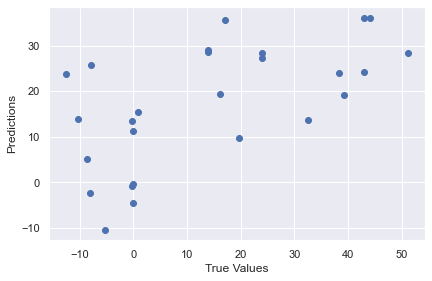

In [585]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [586]:
# find the outlier data point index
np.argmin(y_test-predictions)

7

In [587]:
X_test.iloc[18]

Campus_African_American       0.0
District_African_American     0.0
Campus_Hispanic               9.7
District_Hispanic             7.4
Campus_American_Indian        0.0
District_American_Indian      0.0
Campus_Asian                  0.0
District_Asian                0.0
Campus_Pacific_Islander       0.0
District_Pacific_Islander     0.0
Campus_Two_or_More_Races      0.0
District_Two_or_More_Races    0.0
BIPOC_Campus                  9.7
Name: '006902001, dtype: float64

In [588]:
print(model.score(X_test, y_test))

0.3368143529528713


In [589]:
# betas = zip(X_train.columns, linear.coef_)
# betas[:10]

In [590]:
# calculate rmse

np.sqrt(metrics.mean_squared_error(y_test, predictions))

16.049673871845602

In [320]:
# # LINEAR REGRESSION FOR TARGET = AFRICAN_AMERICAN_MASTERS

# df_african_american_masters = total_df.drop(['African_American_Masters'], axis=1)
# y = total_df.African_American_Masters

# # create training and testing vars
# X_train, X_test, y_train, y_test = train_test_split(df_african_american_masters.iloc[:,1:], y, test_size=0.2)
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

# # fit a model
# lm = LinearRegression()
# model = lm.fit(X_train, y_train)
# predictions = lm.predict(X_test)

# predictions[0:5]

# ## The line / model
# plt.scatter(y_test, predictions)
# plt.xlabel('True Values')
# plt.ylabel('Predictions')

# print(model.score(X_test, y_test))

In [593]:
# create a random forest regressor

rf = RandomForestRegressor(n_estimators = 400, max_depth=2, random_state = 0, oob_score=True)
rf.fit(X_train, y_train)
rf.oob_score_

0.04031530635616898

In [594]:
rf.feature_importances_

array([0.02043029, 0.21060792, 0.12583451, 0.25291587, 0.00350642,
       0.09405944, 0.07112322, 0.0489262 , 0.00339209, 0.04773548,
       0.05742981, 0.02761456, 0.03642419])

In [595]:
# Plot the feature importance
feat_scores = pd.Series(rf.feature_importances_,
                           index=total_df_features.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

ValueError: Length of passed values is 13, index implies 12.

In [547]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

In [548]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 19.41 degrees.


In [549]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


In [550]:
# calculate rmse

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

24.929927165024598

In [523]:
# GridSearchCV

hyperparameters = {'max_depth': [2, 3, 4, 5],  
                   'max_features': ['sqrt', 'log2', None], 
                   'random_state': [0, 1]}
gridsearch = GridSearchCV(rf, hyperparameters, verbose=True, scoring='neg_mean_squared_error')
gridsearch.fit(X_train, y_train)

print("best parameters:", gridsearch.best_params_)
best_rf_model = gridsearch.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.6min finished


best parameters: {'max_depth': 2, 'max_features': None, 'random_state': 0}


In [ ]:
# ROC curves as metric?